## **Neural Network Regression in TensorFlow**

👁️👁️ Looking to solve Regression Problems

 - Architecture of a neural network regression model
 - Input shapes and output shapes of a regression model (**features** and labels)
 - Creating custom data to view and fit
 - Steps in modelling
  - Creating a model, compiling a model, fitting a model, evaluating a model.
 - Different evaluation methods
 - Saving and loading models

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


### Creating data to view and fit

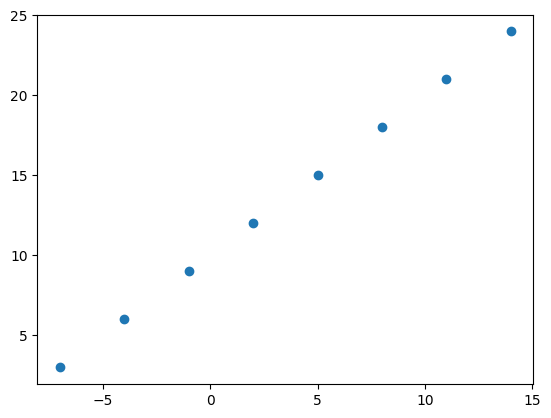

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)


In [3]:
# This is how we get y values from this values (the linear regression of this very simple model)
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

#### Input and Output Shapes

In [5]:
# Create a demo tenosr for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

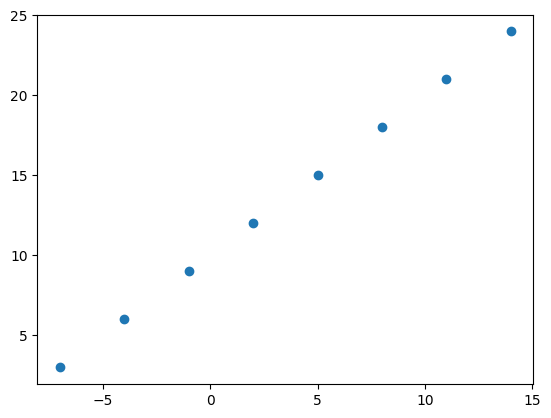

In [10]:
plt.scatter(X, y)


### Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how worng it is), the optimizer (tells our model how to improve the patterns its learning), and the evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels). Epochs - How many times the model will go through all of the training examples
4. **Evaluate the model** on the test data (how reliable are our models predictions?)


In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create amodel using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) # into a list method

# add method
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for Stochastic Gradient Descent
              metrics=['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 701ms/step - loss: 7.8406 - mae: 7.8406
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 7.7081 - mae: 7.7081
Epoch 3/5
1/1 [==============================] - 0s 28ms/step - loss: 7.5756 - mae: 7.5756
Epoch 4/5
1/1 [==============================] - 0s 38ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/5
1/1 [==============================] - 0s 20ms/step - loss: 7.4719 - mae: 7.4719


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 199ms/step


array([[29.318645]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization fucntion or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit the model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Rebuilding our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 607ms/step - loss: 17.4134 - mae: 17.4134
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 17.1322 - mae: 17.1322
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 16.8509 - mae: 16.8509
Epoch 4/100
1/1 [==============================] - 0s 44ms/step - loss: 16.5697 - mae: 16.5697
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 16.2884 - mae: 16.2884
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 16.0072 - mae: 16.0072
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 15.7259 - mae: 15.7259
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 15.4447 - mae: 15.4447
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 15.1634 - mae: 15.1634
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 14.8877 - mae: 14.8877
Epoch 11/100
1/1 [==============================

In [15]:
# Remind the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if the model prediction has improved
model.predict([17.])

1/1 [==============================] - 0s 305ms/step


array([[29.531898]], dtype=float32)

In [17]:
# Rebuilding (third time) our model
# Adding a hidden layer

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 13.5003 - mae: 13.5003
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 13.1816 - mae: 13.1816
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 12.8912 - mae: 12.8912
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 12.5856 - mae: 12.5856
Epoch 5/100
1/1 [==============================] - 0s 58ms/step - loss: 12.2567 - mae: 12.2567
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 11.8990 - mae: 11.8990
Epoch 7/100
1/1 [==============================] - 0s 64ms/step - loss: 11.4799 - mae: 11.4799
Epoch 8/100
1/1 [==============================] - 0s 47ms/step - loss: 10.9984 - mae: 10.9984
Epoch 9/100
1/1 [==============================] - 0s 42ms/step - loss: 10.4048 - mae: 10.4048
Epoch 10/100
1/1 [==============================] - 0s 34ms/step - loss: 9.6785 - mae: 9.6785
Epoch 11/100
1/1 [==============================] - 0

In [18]:
model.predict([17.])

1/1 [==============================] - 0s 199ms/step


array([[32.774853]], dtype=float32)

In [19]:
# Rebuilding our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 15.0315 - mae: 15.0315
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 14.3634 - mae: 14.3634
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 13.7283 - mae: 13.7283
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 13.0988 - mae: 13.0988
Epoch 5/100
1/1 [==============================] - 0s 29ms/step - loss: 12.4697 - mae: 12.4697
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 11.8379 - mae: 11.8379
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 11.2010 - mae: 11.2010
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 10.5568 - mae: 10.5568
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 9.9030 - mae: 9.9030
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 9.2375 - mae: 9.2375
Epoch 11/100
1/1 [==============================] - 0s 

In [20]:
model.predict([25.])

1/1 [==============================] - 0s 497ms/step


array([[35.246162]], dtype=float32)

#### RECAP: Common ways to improve a deep model
- Adding layers
- Increase the number of hideen units
- Change the activation functions
- Change the optimization function
- Change the learning rate (👁️ The most useful hyperparameter to improve our neural network)
- Sampling more data (bigger datasets)
- Fitting training for longer (epochs)

### Evaluating a model

In practice a typical workflow you'll go through when building neural networks is:

```
Build model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it looks like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground thruth (the original labels)?


In [21]:
# Make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

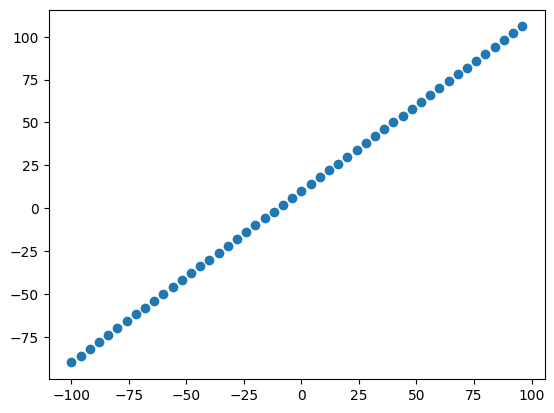

In [25]:
# Visualize the data
plt.scatter(X,y)

#### The three sets...

* Training set - the models learns from this data, which is typlically 70-80% of the data available.
* Validation set - the model gets tuned on this data, which is typpically 10-15% of the data.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typlically 10-15% of the total of the data.

Generalization - The ability for a machine learning model to perform well on data it hasn't seen before.

In [26]:
# Check the length of the samples we have
len(X)

50